In [31]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

In [32]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


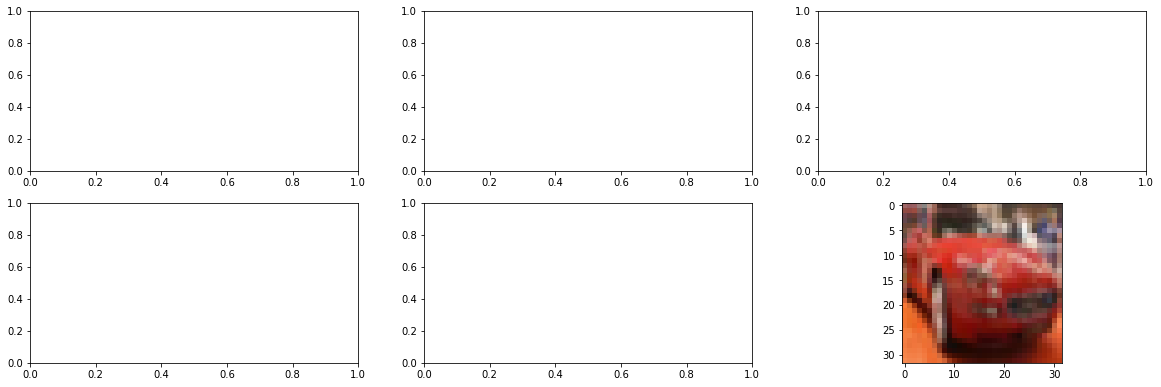

In [33]:
n = 6
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.subplot(330 + 1 + i)
plt.imshow(train_X[i])
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [35]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [36]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

num_classes=test_Y.shape[1]

In [37]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [38]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

In [48]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6813 - accuracy: 0.3913 - val_loss: 1.4156 - val_accuracy: 0.5002
Epoch 2/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.3314 - accuracy: 0.5195 - val_loss: 1.2038 - val_accuracy: 0.5652
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.1605 - accuracy: 0.5864 - val_loss: 1.0718 - val_accuracy: 0.6257
Epoch 4/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.0352 - accuracy: 0.6319 - val_loss: 1.0236 - val_accuracy: 0.6368
Epoch 5/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9397 - accuracy: 0.6651 - val_loss: 0.9749 - val_accuracy: 0.6542
Epoch 6/10
1563/1563 [==============================] - 124s 80ms/step - loss: 0.8597 - accuracy: 0.6954 - val_loss: 0.9450 - val_accuracy: 0.6646
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7880 - accuracy: 0.7210 - val_loss: 0

In [49]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 3s 9ms/step - loss: 0.9202 - accuracy: 0.6881
68.80999803543091


In [51]:
model.save("model1_cifar_10epoch.h5")

In [53]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("__image_path__")
# the input image is required to be in the shape of dataset, i.e (32,32,3)

im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

FileNotFoundError: [Errno 2] No such file or directory: '__image_path__'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 49)